In [226]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [227]:
read_file = pd.read_csv("Raw_data.csv")
data = read_file.transpose().iloc[1:, :]

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
Y = Y.astype(int)

we have loaded the data to X and Y dataframes.

stage frequency analysis:

In [219]:
Stages = np.zeros(13)
for i in range(Y.size):
    Stages[Y.iloc[i]] += 1
print(Stages)

[  7.  90.  86.   6.   6. 358. 257.   2. 156.  27.  65.  20.  14.]


data deletion:

In [228]:
SumStages = 0
bar = 90
for i in range(Stages.size):
    if (Stages[i] < bar):
        X = X.drop(index=X.iloc[int(SumStages):int(SumStages) + int(Stages[i]), :].index.tolist(), inplace=False)
        Y = Y.drop(index=Y.iloc[int(SumStages):int(SumStages) + int(Stages[i])].index.tolist(), inplace=False)
    else:
        SumStages += Stages[i]

Stage_counter = 0
for i in range(Y.size):
    if (i + 1 < Y.size and Y.iloc[i] != Y.iloc[i + 1]):
        Y.iloc[i] = Stage_counter
        Stage_counter += 1
    else:
        Y.iloc[i] = Stage_counter
# X, Y = drop.dropStages(X, Y, bar=30)

run TSNE:

[Text(0.5, 1.0, 'TSNE distribution')]

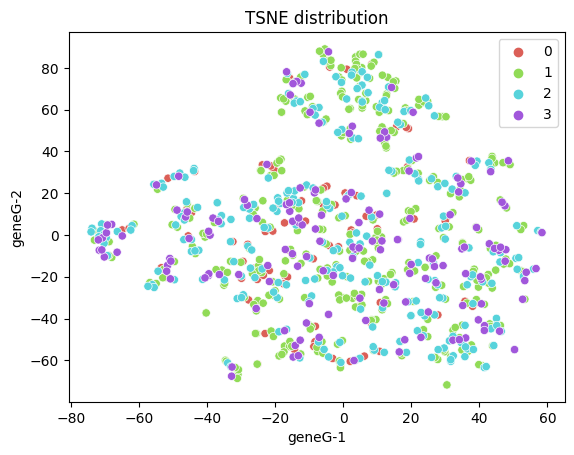

In [217]:
X = TSNE(n_components=2, learning_rate='auto', perplexity=3).fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["Gene Group 1"] = X[:,0]
df["Gene Group 2"] = X[:,1]

sns.scatterplot(x="Gene Group 1", y="Gene Group 2", hue=df.y.tolist(),palette=sns.color_palette("hls", 4),data=df).set(title="TSNE distribution")

split to train and test groups:

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

normal distribution:

In [230]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

range distribution:

In [149]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

logistical regression:

In [181]:
model = LogisticRegression(random_state=0, max_iter=1000, multi_class="multinomial", n_jobs=-1)

Linear regression:

In [231]:
model = LinearRegression(copy_X=True, n_jobs=-1)

train the model:

In [232]:
model.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

model is ready, analyzing the results:

analysis for logistical regression:

print the default score:

In [225]:
score = model.score(X_test, Y_test)
print(score)

-0.0781906535225656


Confusion matrix:

In [184]:
conMat = confusion_matrix(Y_test, model.predict(X_test))
print(conMat)

[[ 0 23  0  0]
 [ 0 83  0  0]
 [ 0 71  0  0]
 [ 0 39  0  0]]


Analysis for linear regression:

Mean squared error:

In [233]:
Y_pred = diabetes_y_pred = model.predict(X_test)
print("%.2f" % mean_squared_error(Y_test, Y_pred))

Mean squared error: 0.88
Coefficient of determination: -0.08


Coefficient of determination:

In [ ]:
print("%.2f" % r2_score(Y_test, Y_pred))